In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_train = pd.read_csv('train.csv')
df_test= pd.read_csv('test.csv')

In [3]:
df_train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [4]:
df_test.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


Check if there is missing value.

In [5]:
print("Number of missing value :",df_train.isnull().sum().sum())

Number of missing value : 0


In [6]:
df_train.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


<Axes: >

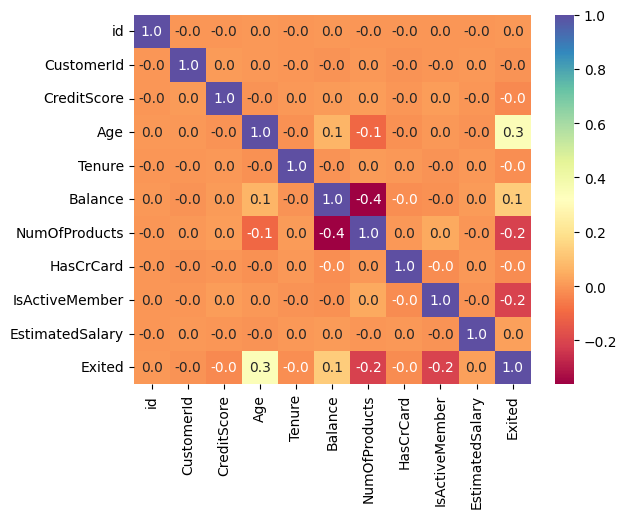

In [7]:
sns.heatmap(df_train.corr(numeric_only=True),cmap=sns.color_palette("Spectral", as_cmap=True),annot=True,fmt=".1f")

In [8]:
def features_eng(df):
    df_encoded = pd.get_dummies(df, dtype=float) #one hod encoded
    df_encoded = df_encoded.drop(columns=['Exited'])
    
    return df_encoded
    

drop Surname and do a one hot encoding

In [9]:
df = pd.concat([df_train, df_test])
df2 = df.drop(columns='Surname')
y = df['Exited']
X_encoded = features_eng(df2)
X_encoded  = X_encoded.drop(columns=['CustomerId'])

Split Train - Test set 

In [10]:
index = df_train.shape[0]
X_tng = X_encoded.loc[X_encoded['id'] < index]
x_tst = X_encoded.loc[X_encoded['id'] >= index]
X_tng = X_tng.drop(columns='id')
x_tst = x_tst.drop(columns='id')


Data after cleaned and encoded

In [11]:
X_tng

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,668,33.0,3,0.00,2,1.0,0.0,181449.97,1.0,0.0,0.0,0.0,1.0
1,627,33.0,1,0.00,2,1.0,1.0,49503.50,1.0,0.0,0.0,0.0,1.0
2,678,40.0,10,0.00,2,1.0,0.0,184866.69,1.0,0.0,0.0,0.0,1.0
3,581,34.0,2,148882.54,1,1.0,1.0,84560.88,1.0,0.0,0.0,0.0,1.0
4,716,33.0,5,0.00,2,1.0,1.0,15068.83,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,667,33.0,2,0.00,1,1.0,1.0,131834.75,0.0,0.0,1.0,1.0,0.0
165030,792,35.0,3,0.00,1,0.0,0.0,131834.45,1.0,0.0,0.0,0.0,1.0
165031,565,31.0,5,0.00,1,1.0,1.0,127429.56,1.0,0.0,0.0,0.0,1.0
165032,554,30.0,7,161533.00,1,0.0,1.0,71173.03,0.0,0.0,1.0,1.0,0.0


Create Labels for training

In [12]:
y = y.dropna()
y

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
165029    0.0
165030    0.0
165031    0.0
165032    0.0
165033    1.0
Name: Exited, Length: 165034, dtype: float64

In [13]:
import keras
from keras import regularizers,layers
from keras.layers import Input,Dense,Dropout

Building model

In [18]:
model = keras.Sequential([
    layers.Normalization(input_shape=[13,], axis=None),
    layers.BatchNormalization(),
    layers.Dense(64, activation='leaky_relu'),
    layers.BatchNormalization(),
    layers.Dense(32, activation='leaky_relu'),
    layers.BatchNormalization(),
    layers.Dense(16, activation='leaky_relu'),
    layers.BatchNormalization(),
    layers.Dense(1, activation='sigmoid')
]
)

In [19]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.1),
    loss=keras.losses.binary_crossentropy,
    metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normaliza  (None, 13)                3         
 tion)                                                           
                                                                 
 batch_normalization_4 (Bat  (None, 13)                52        
 chNormalization)                                                
                                                                 
 dense_4 (Dense)             (None, 64)                896       
                                                                 
 batch_normalization_5 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                      

Trained with 100 epochs

In [21]:

history = model.fit(
    X_tng,
    y,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

Accuracy and loss after training

In [44]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail(1)

,loss,accuracy,val_loss,val_accuracy,epoch
99,0.340563,0.858074,0.332852,0.859515,99


Make a prediction 

In [23]:
y_col = model.predict(x_tst)

3439/3439 [==============================] - 3s 745us/step


Categorize 
- "> 0.5 = 'YES'
- "< 0.5 = 'NO'

In [24]:
res = []
for i in y_col:
    if i >0.5:
        res.append('Yes')
    else:
        res.append('No')
y_res = np.array(res)

Original

In [25]:
df_y = pd.DataFrame(y_col,columns=['Predicted Exited'])
df_y

,Predicted Exited
0,0.032001
1,0.740049
2,0.043688
3,0.178643
4,0.296074
...,...
110018,0.028667
110019,0.061644
110020,0.026142
110021,0.112853


Categorized to Yes or No

In [46]:
y_res = pd.DataFrame(y_res,columns=['Predicted Exited'])
y_res

,Predicted Exited
0,No
1,Yes
2,No
3,No
4,No
...,...
110018,No
110019,No
110020,No
110021,No


Create table for export

In [29]:
res_id = df_test['id']
res_id

0         165034
1         165035
2         165036
3         165037
4         165038
           ...  
110018    275052
110019    275053
110020    275054
110021    275055
110022    275056
Name: id, Length: 110023, dtype: int64

In [45]:
df_res = pd.DataFrame(res_id,columns=['id'])
df_res['Exited'] = df_y 
df_res

,id,Exited
0,165034,0.032001
1,165035,0.740049
2,165036,0.043688
3,165037,0.178643
4,165038,0.296074
...,...,...
110018,275052,0.028667
110019,275053,0.061644
110020,275054,0.026142
110021,275055,0.112853


Export to .csv

In [42]:
df_res.to_csv('submission.csv', index=False)